* Para metros que se modifican en SVM
 * C
 * epsilon
 * kernel

In [1]:
##importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR


In [2]:
#importamos los datos
dfx = pd.DataFrame(load_boston().data, columns=(load_boston()).feature_names)
dfy = pd.DataFrame(load_boston().target)

In [3]:
#Organizamos los datos
X=dfx.iloc[:,5]
X = X[:, np.newaxis]
Y= dfy.iloc[:,0]
Y = Y[:, np.newaxis]
print("Dimensiones en X: {}".format(str(X.shape)))
print("Dimension en Y: {}".format(str(Y.shape)))

Dimensiones en X: (506, 1)
Dimension en Y: (506, 1)


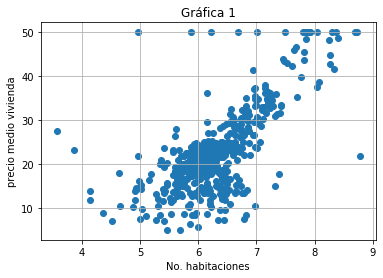

In [4]:
plt.scatter(X,Y)
plt.title("Gráfica 1")
plt.xlabel("No. habitaciones")
plt.ylabel("precio medio vivienda")
plt.grid()
plt.show()

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.3, random_state=4)

In [6]:
svr = SVR(kernel='linear', C=1.0, epsilon=0.2)
#svr = SVR()
svr.fit(X_train, Y_train)

C:\Users\RUBIOAPARICIO\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

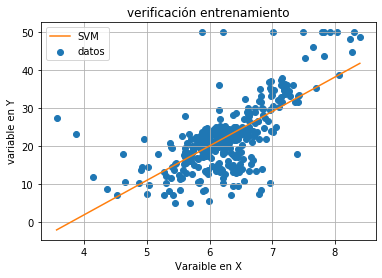

In [7]:
datos_organizados_2=pd.DataFrame([X_train[:,0],svr.predict(X_train)]).transpose()
datos_organizados_2.columns=['x_organizado_2','y_organizado_2']
datos_organizados_2=datos_organizados_2.sort_values('x_organizado_2')
X1_organizado = datos_organizados_2.iloc[:,0]
X1_organizado= X1_organizado[:, np.newaxis]
Y1_organizado = datos_organizados_2.iloc[:,1]
Y1_organizado= Y1_organizado[:, np.newaxis]

#Graficamos los datos ya organizados
plt.scatter(X_train, Y_train,label='datos')
plt.plot(X1_organizado, Y1_organizado, color=  '#ff7f0e',label='SVM')#probar con plot
plt.title("verificación entrenamiento")
plt.xlabel("Varaible en X")
plt.ylabel("variable en Y")
plt.legend()
plt.grid()
plt.show()

In [25]:
Y_pred= svr.predict(X_test)
print('resultado del entrenamiento = {}'.format(svr.score(X_train,Y_train)))
print('resultado con los datos de prueba = {}'.format(svr.score(X_test,Y_test)))

resultado del entrenamiento = 0.46519122959182796
resultado con los datos de prueba = 0.507487747913834


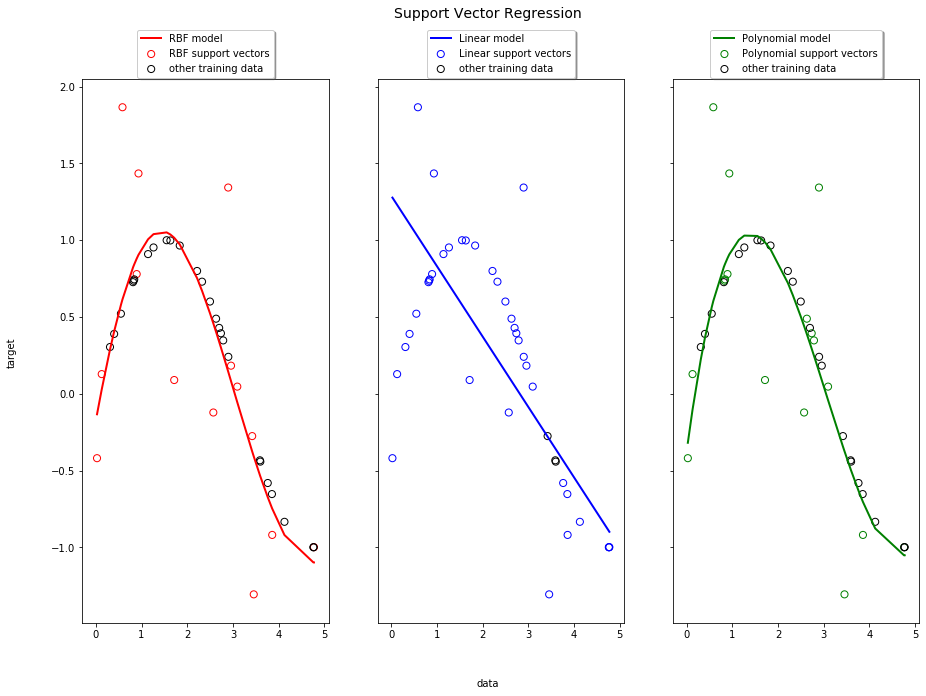

In [27]:
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# #############################################################################
# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)

# #############################################################################
# Look at the results
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['r', 'b', 'g']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(X, svr.fit(X, y).predict(X), color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    axes[ix].scatter(X[svr.support_], y[svr.support_], facecolor="none",
                     edgecolor=model_color[ix], s=50,
                     label='{} support vectors'.format(kernel_label[ix]))
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     facecolor="none", edgecolor="k", s=50,
                     label='other training data')
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()